In [1]:
# Display the distribution of number of cells per shape mode along with explained variance

In [2]:
!date

Wed Mar 30 13:45:25 PDT 2022


In [3]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

In [4]:
# Controller form cvapipe_analysis
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
control = controller.Controller(general.load_config_file(path_config))
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [5]:
device = io.LocalStagingIO(control)
df = device.load_step_manifest("preprocessing")
space = shapespace.ShapeSpace(control)
space.execute(df)

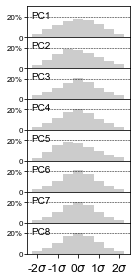

In [6]:
height = 0.5
bin_centers = control.get_map_points()
binw = 0.5*np.diff(bin_centers).mean() if len(bin_centers) > 1 else 1
bin_edges = np.unique([(b-binw, b+binw) for b in bin_centers])
bin_edges[0] = -2.25
bin_edges[-1] = 2.25
sms = control.get_shape_modes()
fig, axs = plt.subplots(len(sms),1, figsize=(4*height,len(sms)*height), sharex=True, gridspec_kw={"hspace": 0})
for smid, (sm, ax) in enumerate(zip(sms, axs)):
    space.set_active_shape_mode(shape_mode=sm, digitize=True)
    values = space.axes[sm].values
    std = space.get_active_scale()
    weights = np.ones(len(values))/len(values)
    ax.hist(values/std, bins=bin_edges, color="gray", alpha=0.4, weights=weights)
    ax.set_yticks([0, 0.2], [0, "20%"])
    ax.tick_params(axis="y", which='major', labelsize=8, pad=0)
    ax.set_ylim(0, 0.3)
    ax.axhline(y=0.2, color="k", linestyle="--", lw=0.5)
    ax.text(-2.3,0.19,f"PC{smid+1}")
ax.set_xlim(-2.5, 2.5)
sigmas = np.linspace(-2, 2, 5)
ax.set_xticks(sigmas, [f"{int(s)}$\sigma$" for s in sigmas])
ax.tick_params(axis="x", which='major', labelsize=12)
plt.tight_layout()
plt.savefig("FigureShapeSpace1_hists.pdf")
plt.show()

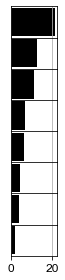

In [9]:
height = 0.5
values = space.pca.explained_variance_ratio_
sms = control.get_shape_modes()
fig, axs = plt.subplots(len(sms),1, figsize=(2*height,len(sms)*height), sharex=True, gridspec_kw={"hspace": 0})
for sm, ax, v in zip(sms, axs, values):
    ax.barh(y=0, width=100*v, color="black")
    ax.set_yticks([])
    ax.grid()
ax.tick_params(axis="x", which='major', labelsize=12)
plt.tight_layout()
plt.savefig("FigureShapeSpace1_vars.pdf")
plt.show()

In [8]:
!ls

FigureShapeSpace1_hists.pdf  FigureShapeSpace1_vars.pdf
FigureShapeSpace1.ipynb
